In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import sys

[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]
from get_rat_data import *

In [78]:
df = get_rat_viol_data()
vs = df.query("training_stage > 2").groupby("animal_id").violation.mean().values

vs.std(), vs.mean()

returning dataset for all animals


(0.1023214480395597, 0.28992318071664996)

## Akrami Rat Weights

In [43]:
feature = [
    "Stim A",
    "Stim B",
    "Prev Reward",
    "Stim A - 1",
    "Stim B - 1",
    "Stim A - 2",
    "Stim B - 2",
    "Sensory Mean",
    "Bias",
]
weight = [5, -7, 0.5, 0.5, -0.3, 0.4, -0.2, 0.1, 0.04]

color = [
    "red",
    "blue",
    "#D8B3E2",
    "#DF806C",
    "#829EE5",
    "#E1A99D",
    "#B3C0E2",
    "green",
    "yellow",
]

simulated_df = pd.DataFrame({"Feature": feature, "Weight": weight, "Color": color})

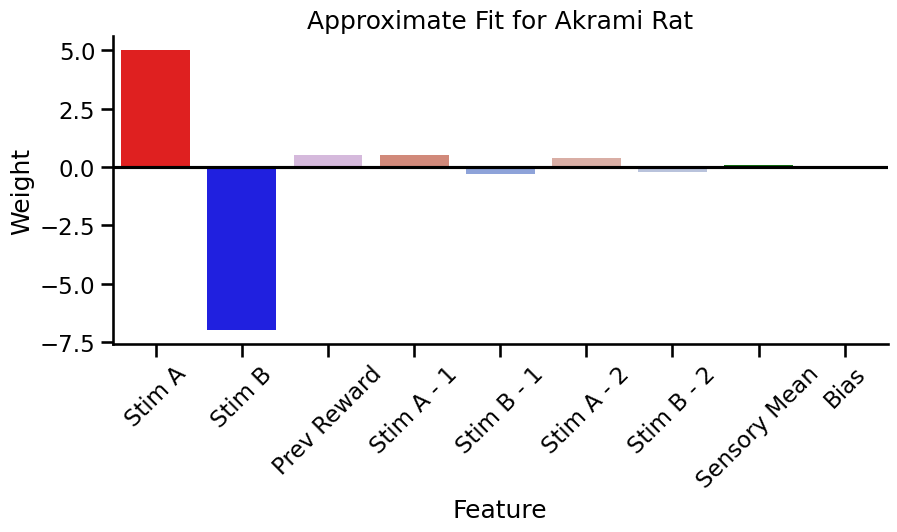

In [38]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=simulated_df,
    x="Feature",
    y="Weight",
    hue_order=feature,
    palette=simulated_df.Color,
)
_ = plt.xticks(rotation=45)

ax.axhline(0, color="k")
_ = ax.set_title("Approximate Fit for Akrami Rat")
sns.despine()

## Training Plot

In [52]:
df = get_rat_viol_data(animal_ids="W075")

grouped_df = df.groupby(["animal_id", "session", "training_stage"]).hit.mean()

# Calculate the rolling mean with a window of 14 sessions for each subject
rolling_mean = grouped_df.rolling(window=7).mean().reset_index()

returning data for W075


[Text(0, 0.5, 'Hit Rate'), Text(0.5, 0, 'Session')]

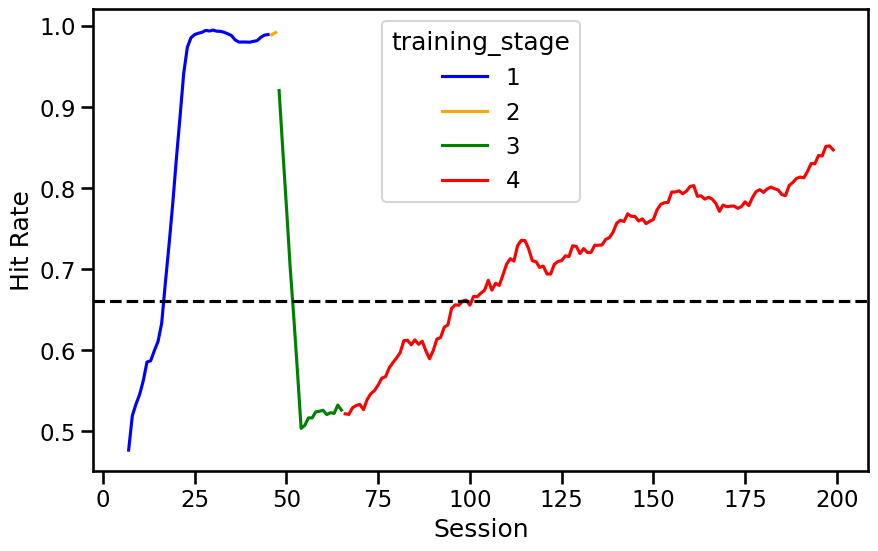

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=rolling_mean,
    y="hit",
    x="session",
    hue="training_stage",
    palette=["blue", "orange", "green", "red"],
    ax=ax,
)

ax.axhline(y=0.66, color="k", linestyle="--")
ax.set(ylabel=("Hit Rate"), xlabel="Session")